# Convert Background Lighting Sketch to LED Coordinate List
loads the png. pixelart and makes it into a .csv with led coordinates and their background color

[  0  78 133 255]


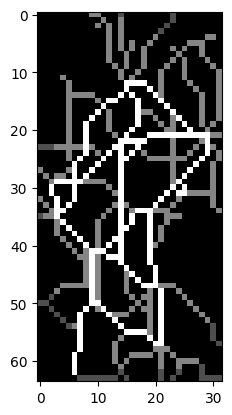

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
background_img = cv2.imread("./sketches/de_background_lighting_sketch.png", cv2.IMREAD_GRAYSCALE)


print(np.unique(background_img))

plt.imshow(background_img, cmap='gray')


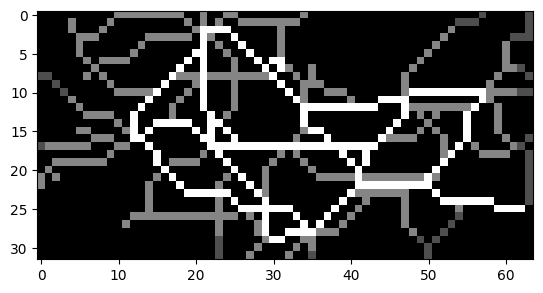

In [2]:
# needs to be rotated, as it is displayed on a display that is normally not hochkant 
background_img_rot = cv2.rotate(background_img, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(background_img_rot, cmap='gray')

In [3]:
# 0 = nichts
# 78  = Auslandsstrecke
# 133 = Strecke
# 225 = Kreuzungsbahnhof
# 255 = Strecke wichtig

# iterate over all pixels. If at pos xy there is 129, add the pixel xy with the DB color to the csv. If there is 255, add with RNV color.

import pandas as pd

FOREIGN_TRACK_VALUE = 78
TRACK_VALUE = 133
TRACK_IMPORTANT_VALUE = 255
STATION_VALUE = 225


TRACK_IMPORTANT_BACKGROUND_COLOR = '3D422A'
TRACK_BACKGROUND_COLOR = "111111"
FOREIGN_TRACK_BACKGROUND_COLOR = "050505"
STATION_BACKGROUND_COLOR = "6E7A3F"

background_lighting_rows = []


for y in range(background_img_rot.shape[0]):
    for x in range(background_img_rot.shape[1]):
        pixel = background_img_rot[y,x]
        
        if pixel == TRACK_VALUE:
            background_lighting_row = pd.DataFrame(data={'led': [f"{x}-{y}"], 'color': [TRACK_BACKGROUND_COLOR]})
            background_lighting_rows.append(background_lighting_row)
        
        if pixel == TRACK_IMPORTANT_VALUE:
            background_lighting_row = pd.DataFrame(data={'led': [f"{x}-{y}"], 'color': [TRACK_IMPORTANT_BACKGROUND_COLOR]})
            background_lighting_rows.append(background_lighting_row)
            
        if pixel == FOREIGN_TRACK_VALUE:
            background_lighting_row = pd.DataFrame(data={'led': [f"{x}-{y}"], 'color': [FOREIGN_TRACK_BACKGROUND_COLOR]})
            background_lighting_rows.append(background_lighting_row)
            
        if pixel == STATION_VALUE:
            background_lighting_row = pd.DataFrame(data={'led': [f"{x}-{y}"], 'color': [STATION_BACKGROUND_COLOR]})
            background_lighting_rows.append(background_lighting_row)
            
df_background_lighting = pd.concat(background_lighting_rows)

df_background_lighting.to_csv('background_lighting_de.csv', index=False)
        
            
